In [3]:
#0.  Setup
# Numpy for working with Arrays
import numpy as np
# Pandas for working with data tables
import pandas as pd
# SciPy implements many different numerical algorithms
import scipy as sp
import scipy.stats as stats
# Module for plotting
import matplotlib
import matplotlib.pyplot as plt
# Module for linear regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

%matplotlib inline 

---

## Part 1: Descriptive analysis

### 1. What information/features/characteristics do you have for each observation? 


In [63]:
#load data from csv file
water_values = pd.read_csv('train_set_values.csv')
water_labels = pd.read_csv('train_set_labels.csv')


#examine data structures
print water_values.shape
print water_values.dtypes
print water_labels.shape

#preview data
water_values.head()
water_labels.head()

(59400, 40)
id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   objec

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [64]:
### merge values and labels
water = pd.merge(water_values, water_labels, on='id')
print water.shape
water.head()

(59400, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,...,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000,3/14/11,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,...,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0,3/6/13,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,...,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25,2/25/13,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,...,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0,1/28/13,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,...,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0,7/13/11,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,...,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [65]:
# water.describe()

In [66]:
# water_summary = water.describe(include='all')
# water_summary
# water[['extraction_type', 'extraction_type_group', 'extraction_type_class']].head().describe()
# water[water.extraction_type != water.extraction_type_class].count()

### 2. What are the min/max/mean/median/sd values for each of these features? 
#### 2.1 Summary statistics of numerical fields

In [67]:
# Exclude year', 'folnum', 'village' from list of columns
cols = [col for col in water.columns if col not in ['date_recorded', 'funder', 'installer', 'wpt_name',\
                                                   'basin', 'subvillage', 'region', 'region_code', \
                                                   'district_code', 'lga', 'ward', 'public_meeting', \
                                                   'recorded_by', 'scheme_management', 'scheme_name', \
                                                   'permit', 'extraction_type', \
                                                    'extraction_type_group', 'extraction_type_class', \
                                                    'management', 'management_group', 'payment','payment_type', \
                                                    'water_quality', 'quality_group', 'quantity', \
                                                   'quantity_group', 'source', 'source_type', 'source_class', \
                                                   'waterpoint_type', 'waterpoint_type_group', 'status_group']]

# Get the mean and standard deviation for selected variables
summary = water[cols].describe().transpose()
#[['mean', 'std', 'min', 'max']]

# Give name to column that has the list of variables 
summary.index.names = ['variable']

# Move the index into the columns
summary.reset_index(inplace=True, drop=False)

# Sort the result by the name of variables alphabetically
summary.sort_values(by='variable', ascending=1, inplace=True)

# Sort the index
summary=summary.reset_index()
#[['variable','mean','std']]

summary

,index,variable,count,mean,std,min,25%,50%,75%,max
0,1,amount_tsh,59400,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
1,7,construction_year,59400,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03
2,2,gps_height,59400,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
3,0,id,59400,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
4,4,latitude,59400,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
5,3,longitude,59400,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
6,5,num_private,59400,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
7,6,population,59400,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04


#### 2.2 Check all columns with null values

In [68]:
# Check for nulls in the data
water_null = pd.DataFrame(water.isnull().sum(axis=0)/len(water)).reset_index()
water_null.columns = ['columns', 'percentage']
print water_null.sort_values(by='percentage', ascending=False)

                  columns  percentage
21            scheme_name    0.474175
20      scheme_management    0.065269
5               installer    0.061532
3                  funder    0.061195
18         public_meeting    0.056128
22                 permit    0.051448
11             subvillage    0.006246
29                payment    0.000000
39  waterpoint_type_group    0.000000
25  extraction_type_group    0.000000
26  extraction_type_class    0.000000
38        waterpoint_type    0.000000
27             management    0.000000
28       management_group    0.000000
37           source_class    0.000000
36            source_type    0.000000
31          water_quality    0.000000
32          quality_group    0.000000
24        extraction_type    0.000000
33               quantity    0.000000
34         quantity_group    0.000000
35                 source    0.000000
30           payment_type    0.000000
0                      id    0.000000
23      construction_year    0.000000
10          

The nulls reside only in non-numerical fields. The list of fields with nulls are scheme_name, scheme_management, installer, funder, public_meeting, permit, subvillage from highest to lowest.

#### 2.3 Check the numerical columns with missing values.

In [69]:
# Get the numerical columns with value '0'  
cols_with_zero = pd.DataFrame(water[cols] == 0).sum()
print cols_with_zero

id                       1
amount_tsh           41639
gps_height           20438
longitude             1812
latitude                 0
num_private          58643
population           21381
construction_year    20709
dtype: int64


There are large amount of records have value '0' in fields amount_tsh, gps_height, num_private, population and construction_year.

#### 2.4 Check the distribution of numerical columns after excluding records with value 0 

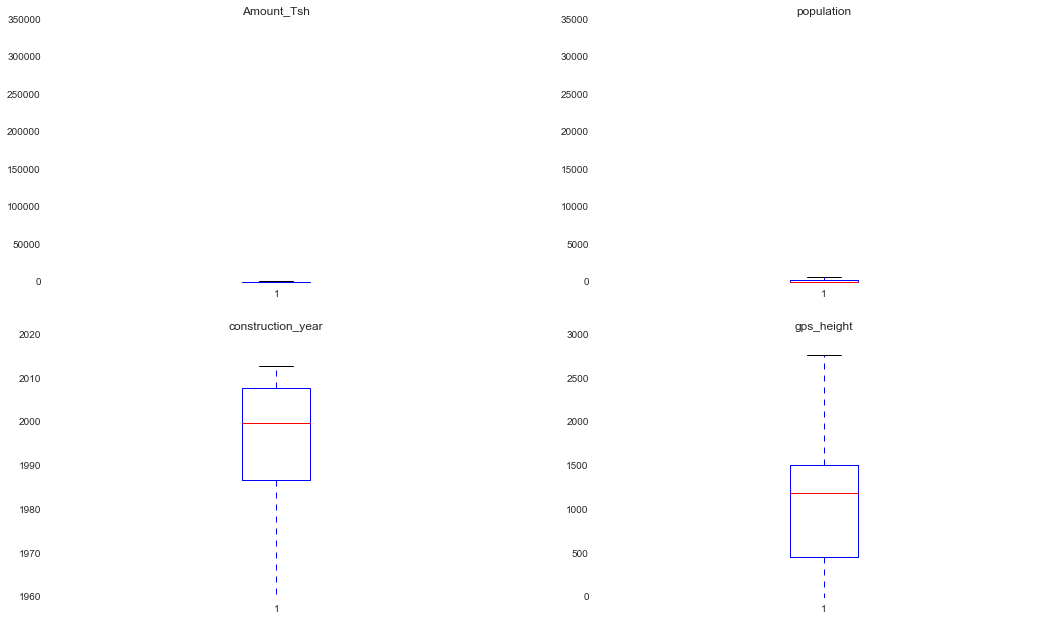

In [70]:
# Distribution of amount_tsh after excluding records with value 0 

plt.figure(figsize=(18, 16))

plt.subplot(321)
water_box = water[(water.amount_tsh > 0)]
#print water_box['amount_tsh'].describe()
plt.boxplot(water_box['amount_tsh'])
plt.title("Amount_Tsh")

plt.subplot(322)
water_box = water[(water.population > 0)]
#print water_box['population'].describe()
plt.boxplot(water_box['population'])
plt.title("population")

plt.subplot(323)
water_box = water[(water.construction_year > 0)]
#print water_box['construction_year'].describe()
plt.boxplot(water_box['construction_year'])
plt.title("construction_year")

# Exclude field num_private as its description is not clear
# plt.subplot(324)
# water_box = water[(water.num_private > 0)]
# #print water_box['num_private'].describe()
# plt.boxplot(water_box['num_private'])

plt.subplot(324)
water_box = water[(water.gps_height > 0)]
#print water_box['gps_height'].describe()
plt.boxplot(water_box['gps_height'])
plt.title("gps_height")

#### 2.5 Check for columns that could be condensed.

##### 2.5.1 extraction_type, extraction_type_group extraction_type_class

In [71]:
# Check for columns that could be condensed
f1 = water[water.extraction_type == water.extraction_type_group]['extraction_type_group'].count()*100/float(len(water))
print "The values in extraction_type and extraction_type_group are %.2f%% similar" % f1

print 
f2 = water[water.extraction_type_class == water.extraction_type_group]['extraction_type_group'].count()*100/float(len(water))
print "The values in extraction_type_group and extraction_type_class are %.2f%% similar" % f2

# Check which columns have more values
print "Field extraction_type has %d unique values" % water.extraction_type.unique().size 
print "Field extraction_type_group has %d unique values" % water.extraction_type_group.unique().size
print "Field extraction_type_class has %d unique values" % water.extraction_type_class.unique().size

The values in extraction_type and extraction_type_group are 95.84% similar

The values in extraction_type_group and extraction_type_class are 67.27% similar
Field extraction_type has 18 unique values
Field extraction_type_group has 13 unique values
Field extraction_type_class has 7 unique values


The values in extraction_type and extraction_type_group are 96% similar. 
The values in extract_type_class and extract_type_group are about 67% similar.

We will choose the field extraction_type as it contains the most number of unique values comparing to the other two similar fields.

##### 2.5.2 payment, payment_type

In [72]:
# Check for columns that could be condensed
print water[['payment']].groupby(water.payment).count()
print water[['payment_type']].groupby(water.payment_type).count()

                       payment
payment                       
never pay                25348
other                     1054
pay annually              3642
pay monthly               8300
pay per bucket            8985
pay when scheme fails     3914
unknown                   8157
              payment_type
payment_type              
annually              3642
monthly               8300
never pay            25348
on failure            3914
other                 1054
per bucket            8985
unknown               8157


Fields payment and payment_type are storing the same information except the description of the payment and payment type is slightly different for some. We can pick either one as the feature for further analysis.

** payment payment_type **
pay annually -> annually    
pay monthly -> monthly   
pay per bucket -> per bucket   
pay when scheme fail -> on failure   
never pay -> never pay   
other -> other   
unknown -> unknown  

##### 2.5.3 water_quality, quality_group, quantity, quantity_group

In [73]:
# Check for columns that could be condensed
print water[['water_quality']].groupby(water.water_quality).count()
print water[['quality_group']].groupby(water.quality_group).count()
print water[['quantity']].groupby(water.quantity).count()
print water[['quantity_group']].groupby(water.quantity_group).count()

                    water_quality
water_quality                    
coloured                      490
fluoride                      200
fluoride abandoned             17
milky                         804
salty                        4856
salty abandoned               339
soft                        50818
unknown                      1876
               quality_group
quality_group               
colored                  490
fluoride                 217
good                   50818
milky                    804
salty                   5195
unknown                 1876
              quantity
quantity              
dry               6246
enough           33186
insufficient     15129
seasonal          4050
unknown            789
                quantity_group
quantity_group                
dry                       6246
enough                   33186
insufficient             15129
seasonal                  4050
unknown                    789


Fields water_quality and quality_group are storing similar information except the value in water_quality are more granular. 

Fields quantity and quantity_group are storing similar information.   

We can pick water_quality and quantity for further feature analysis.

##### 2.5.4 scheme_name and scheme_management

In [74]:
# Check for columns that could be condensed
#print water[['scheme_name']].groupby(water.scheme_name).count().size
print water[['scheme_management']].groupby(water.scheme_management).count()

                   scheme_management
scheme_management                   
Company                         1061
None                               1
Other                            766
Parastatal                      1680
Private operator                1063
SWC                               97
Trust                             72
VWC                            36793
WUA                             2883
WUG                             5206
Water Board                     2748
Water authority                 3153


Based on the field definition, schema_name and scheme_management both store the information about who operates the waterpoint, since there are less number of missings in schema_management, we will disregard schema_name in further analysis.

#### 2.6 What is the distribution of the core features (show a histogram)? 

##### 2.6.1 status_group

In [75]:
water['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

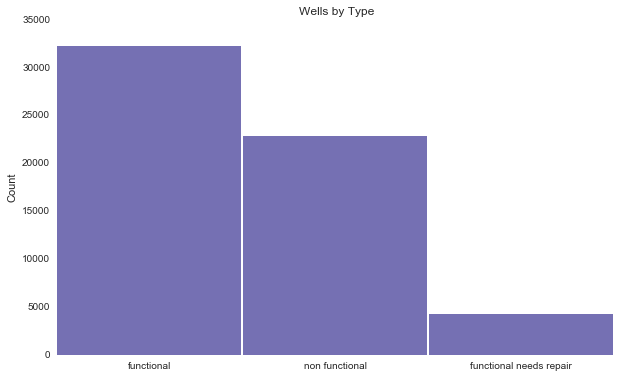

In [76]:
# Copied from master branch on 4/28

%matplotlib inline 

# set some nicer defaults for matplotlib (from: Raza Khan, INFX 574 University of Washington, 2016)
from matplotlib import rcParams

# Some code below to produce pretty graphs
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 30)

# set some nicer defaults for matplotlib
from matplotlib import rcParams

#these colors come from colorbrewer2.org. Each is an RGB triplet
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = False
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'

# make function to remove borders/ticks
def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesary plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()


# make df to hold Status_group counts
label_counts = pd.DataFrame(water.status_group.value_counts())

# set plot parameters
ind = np.arange(label_counts.index.size)
width = .99

# create plot
plt.bar(ind, label_counts.status_group.values, width = width, color = dark2_colors[2])

# add labels
plt.gca().set_ylabel('Count')
plt.gca().set_title('Wells by Type')
plt.xticks(ind + width/2., label_counts.index)

# define style
def histogram_style():
    remove_border(left=False)
    plt.grid(False)
    plt.grid(axis='y', color='w', linestyle='-', lw=1)
    
histogram_style()

In [77]:
# Copied from master branch on 4/28

# set date_recorded to date/time
water['date_recorded'] = pd.to_datetime(water['date_recorded'])

# set all categorical values to category: based on having fewer than 50 unique values
for c in water:
    if water[c].dtypes == 'O':
        if len(water[c].unique()) < 50:
            water[c] = water[c].astype('category')

In [78]:
# %matplotlib inline 
# import seaborn as sns
# #src https://stanford.edu/~mwaskom/software/seaborn/tutorial/categorical.html

# #sns.barplot(x="status_group", y=train['status_group'].value_counts(), data=train)
# #sns.barplot(x="status_group", y="quality_group", hue="quality_group",data=train)
# sns.countplot(x="status_group", data=water)

##### 2.6.2 water_quality, quantity

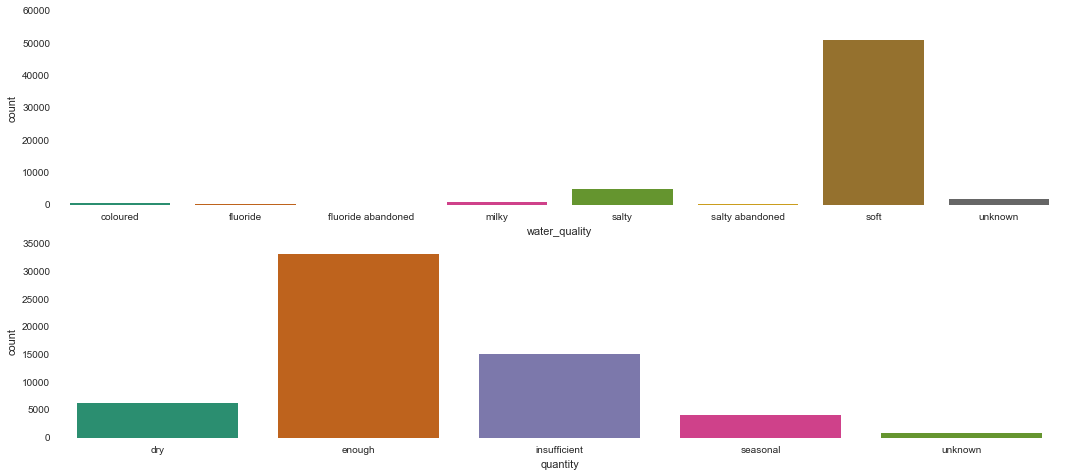

In [79]:
# Distribution of water_quality, quantity

plt.figure(figsize=(18, 16))
 
plt.subplot(411)
sns.countplot(x="water_quality", data=water)
#plt.title('First plot. water_quality',fontsize=10)
 
# plt.subplot(412)
# sns.countplot(x="quality_group", data=water)
# #plt.title('Second plot, quality_group',fontsize=10)

plt.subplot(412)
sns.countplot(x="quantity", data=water)
#plt.title('Third plot. quantity',fontsize=10)
 
# plt.subplot(414)
# sns.countplot(x="quantity_group", data=water)
# #plt.title('Fourth plot, quantity_group',fontsize=10)

##### 2.6.3 payment

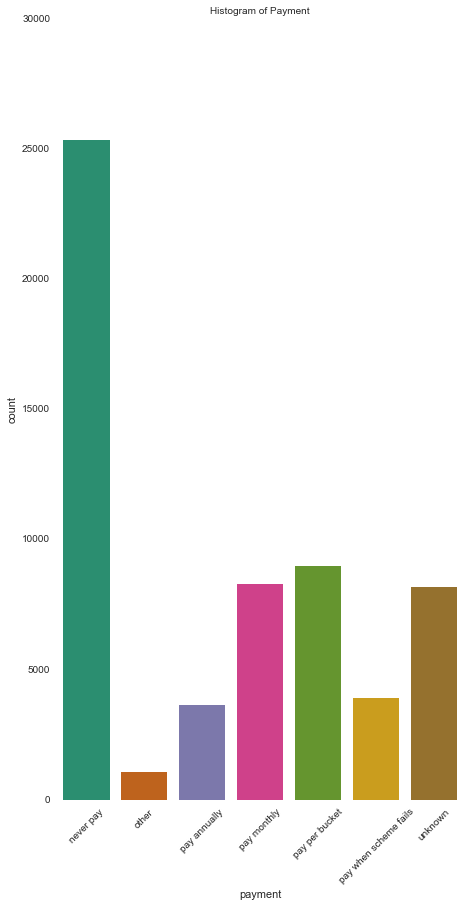

In [80]:
# Group the count by payment
payment_df = water.groupby(['payment'])['payment'].count()
payment_type_df = water.groupby(['payment_type'])['payment_type'].count()

plt.figure(figsize=(16, 14))

# Distribution of water payment
plt.subplot(121)
g = sns.countplot(x="payment", data=water)
plt.title('Histogram of Payment',fontsize=10)
# Rotate the x label diagonal
for item in g.get_xticklabels():
    item.set_rotation(45)

# # Distribution of water payment_type
# plt.subplot(122)
# g = sns.countplot(x="payment_type", data=water)
# plt.title('Histogram of Payment Type',fontsize=10)
# # Rotate the x label diagonal
# for item in g.get_xticklabels():
#     item.set_rotation(45)
 

In [81]:
payment_per = pd.DataFrame(water[['payment', 'id']].groupby(['payment']).count()/len(water)).reset_index()
payment_per.columns = ['payment', 'percentage']
print payment_per.sort_values(by='percentage')

                 payment  percentage
1                  other    0.017744
2           pay annually    0.061313
5  pay when scheme fails    0.065892
6                unknown    0.137323
3            pay monthly    0.139731
4         pay per bucket    0.151263
0              never pay    0.426734


Within total 59,400 records, 42% of them have payment as 'never pay'. 

##### 2.6.4 extraction_type

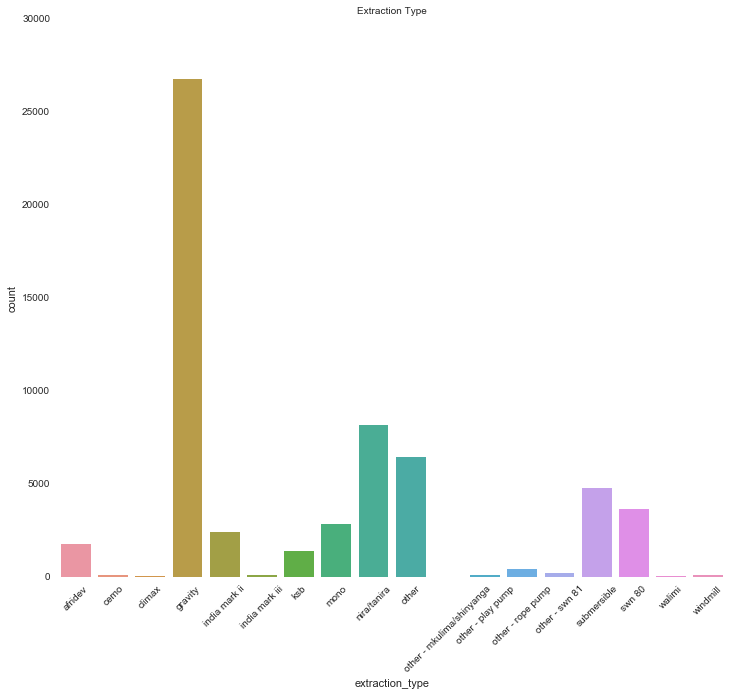

In [82]:
# Distribution of water Extraction_Type
plt.figure(figsize=(12, 10))
 
g = sns.countplot(x="extraction_type", data=water)
plt.title('Extraction Type',fontsize=10)
# Rotate the x label diagonal
for item in g.get_xticklabels():
    item.set_rotation(45)

In [83]:
extraction_per = pd.DataFrame(water[['extraction_type', 'id']].groupby(['extraction_type']).count()/len(water)).reset_index()
extraction_per.columns = ['extraction_type', 'percentage']
print extraction_per.sort_values(by='percentage')

              extraction_type  percentage
10  other - mkulima/shinyanga    0.000034
2                      climax    0.000539
16                     walimi    0.000808
11          other - play pump    0.001431
1                        cemo    0.001515
5              india mark iii    0.001650
17                   windmill    0.001970
13             other - swn 81    0.003855
12          other - rope pump    0.007593
6                         ksb    0.023822
0                     afridev    0.029798
4               india mark ii    0.040404
7                        mono    0.048232
15                     swn 80    0.061785
14                submersible    0.080202
9                       other    0.108249
8                 nira/tanira    0.137273
3                     gravity    0.450842


##### 2.6.5 construction_year

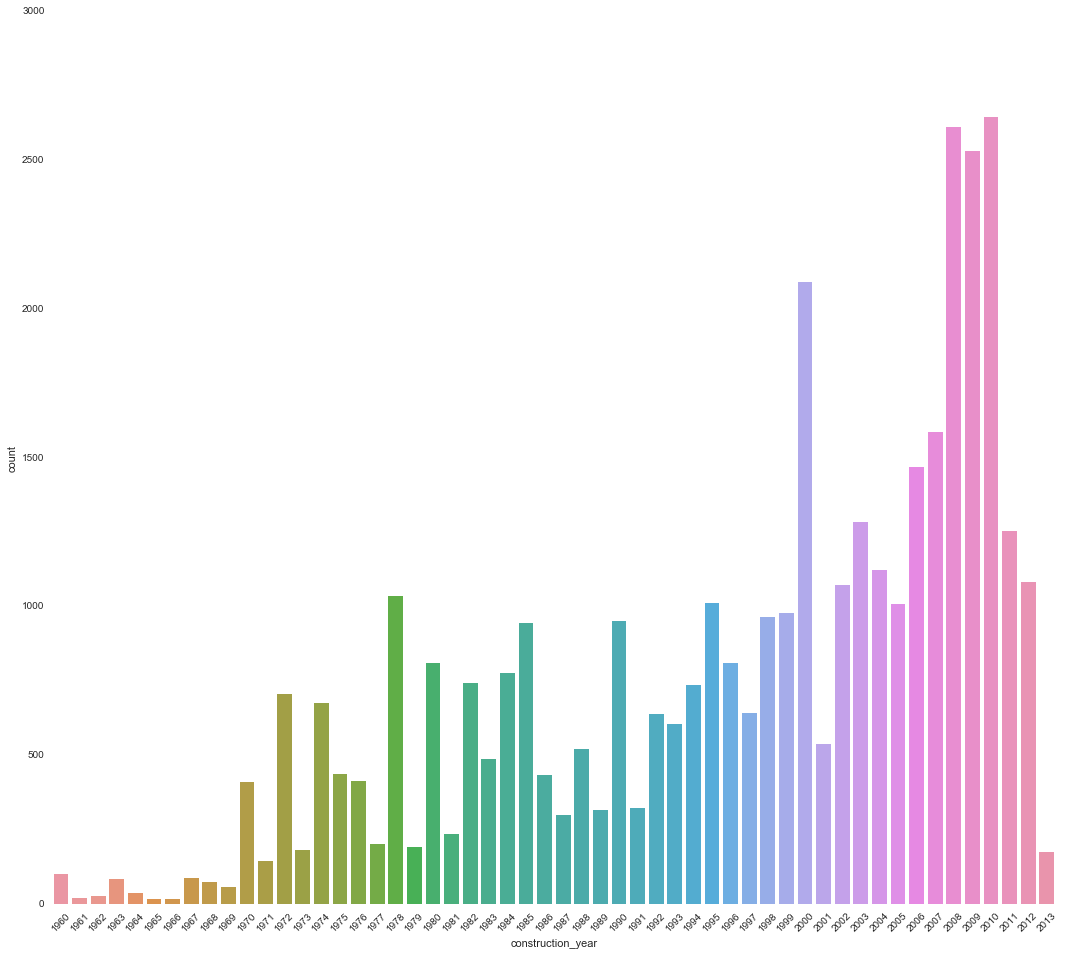

In [84]:
# Distribution of water construction_year 
plt.figure(figsize=(18, 16))

# Filter out records with year == 0
g = sns.countplot(x="construction_year", data=water[water.construction_year > 0]);

# Rotate the x label diagonal
for item in g.get_xticklabels():
    item.set_rotation(45)


### 3.	Are there obvious trends in the data (over time, across subgroups, etc.), and are the difference statistically significant? 

#### 3.1 tidy the data

In [157]:
# Replace missing values in categorical fields 
# Exclude the fields that could be condensed

water_tidy = water.drop(['scheme_name', 'extraction_type_group', 'extraction_type_class', 'payment_type', \
                          'quality_group', 'quantity_group'], axis=1)

water_tidy = pd.merge(water_values, water_labels, on='id')

water_tidy.scheme_management = water_tidy['scheme_management'].fillna('None')  # Replace NaN with 'None'
water_tidy.scheme_name = water_tidy['scheme_name'].fillna('None')  # Replace NaN with 'None'
water_tidy.loc[water.installer == 0, ['installer']] = 'missing'  # replace value 0 with 'missing'
water_tidy.installer = water_tidy.installer.fillna('missing')  # replace NaN with 'missing'
water_tidy.loc[water.funder == 0, ['funder']] = 'missing'  # replace value 0 with 'missing'
water_tidy.funder = water_tidy.funder.fillna('missing')  # replace NaN with 'missing'
water_tidy.subvillage = water_tidy.subvillage.fillna('missing')  # replace NaN with 'missing'
water_tidy.public_meeting = water_tidy.public_meeting.fillna('missing')  # replace NaN with 'missing'
water_tidy.permit = water_tidy.permit.fillna('missing')  # replace NaN with 'missing'

# Verify that no more nulls
water_tidy_null = pd.DataFrame(water_tidy.isnull().sum(axis=0)/len(water_tidy)).reset_index()
water_tidy_null.columns = ['columns', 'percentage']
print water_tidy_null.sort_values(by='percentage', ascending=False)

                  columns  percentage
0                      id           0
21            scheme_name           0
23      construction_year           0
24        extraction_type           0
25  extraction_type_group           0
26  extraction_type_class           0
27             management           0
28       management_group           0
29                payment           0
30           payment_type           0
31          water_quality           0
32          quality_group           0
33               quantity           0
34         quantity_group           0
35                 source           0
36            source_type           0
37           source_class           0
38        waterpoint_type           0
39  waterpoint_type_group           0
22                 permit           0
20      scheme_management           0
1              amount_tsh           0
19            recorded_by           0
2           date_recorded           0
3                  funder           0
4           

#### 3.2 matrix plot

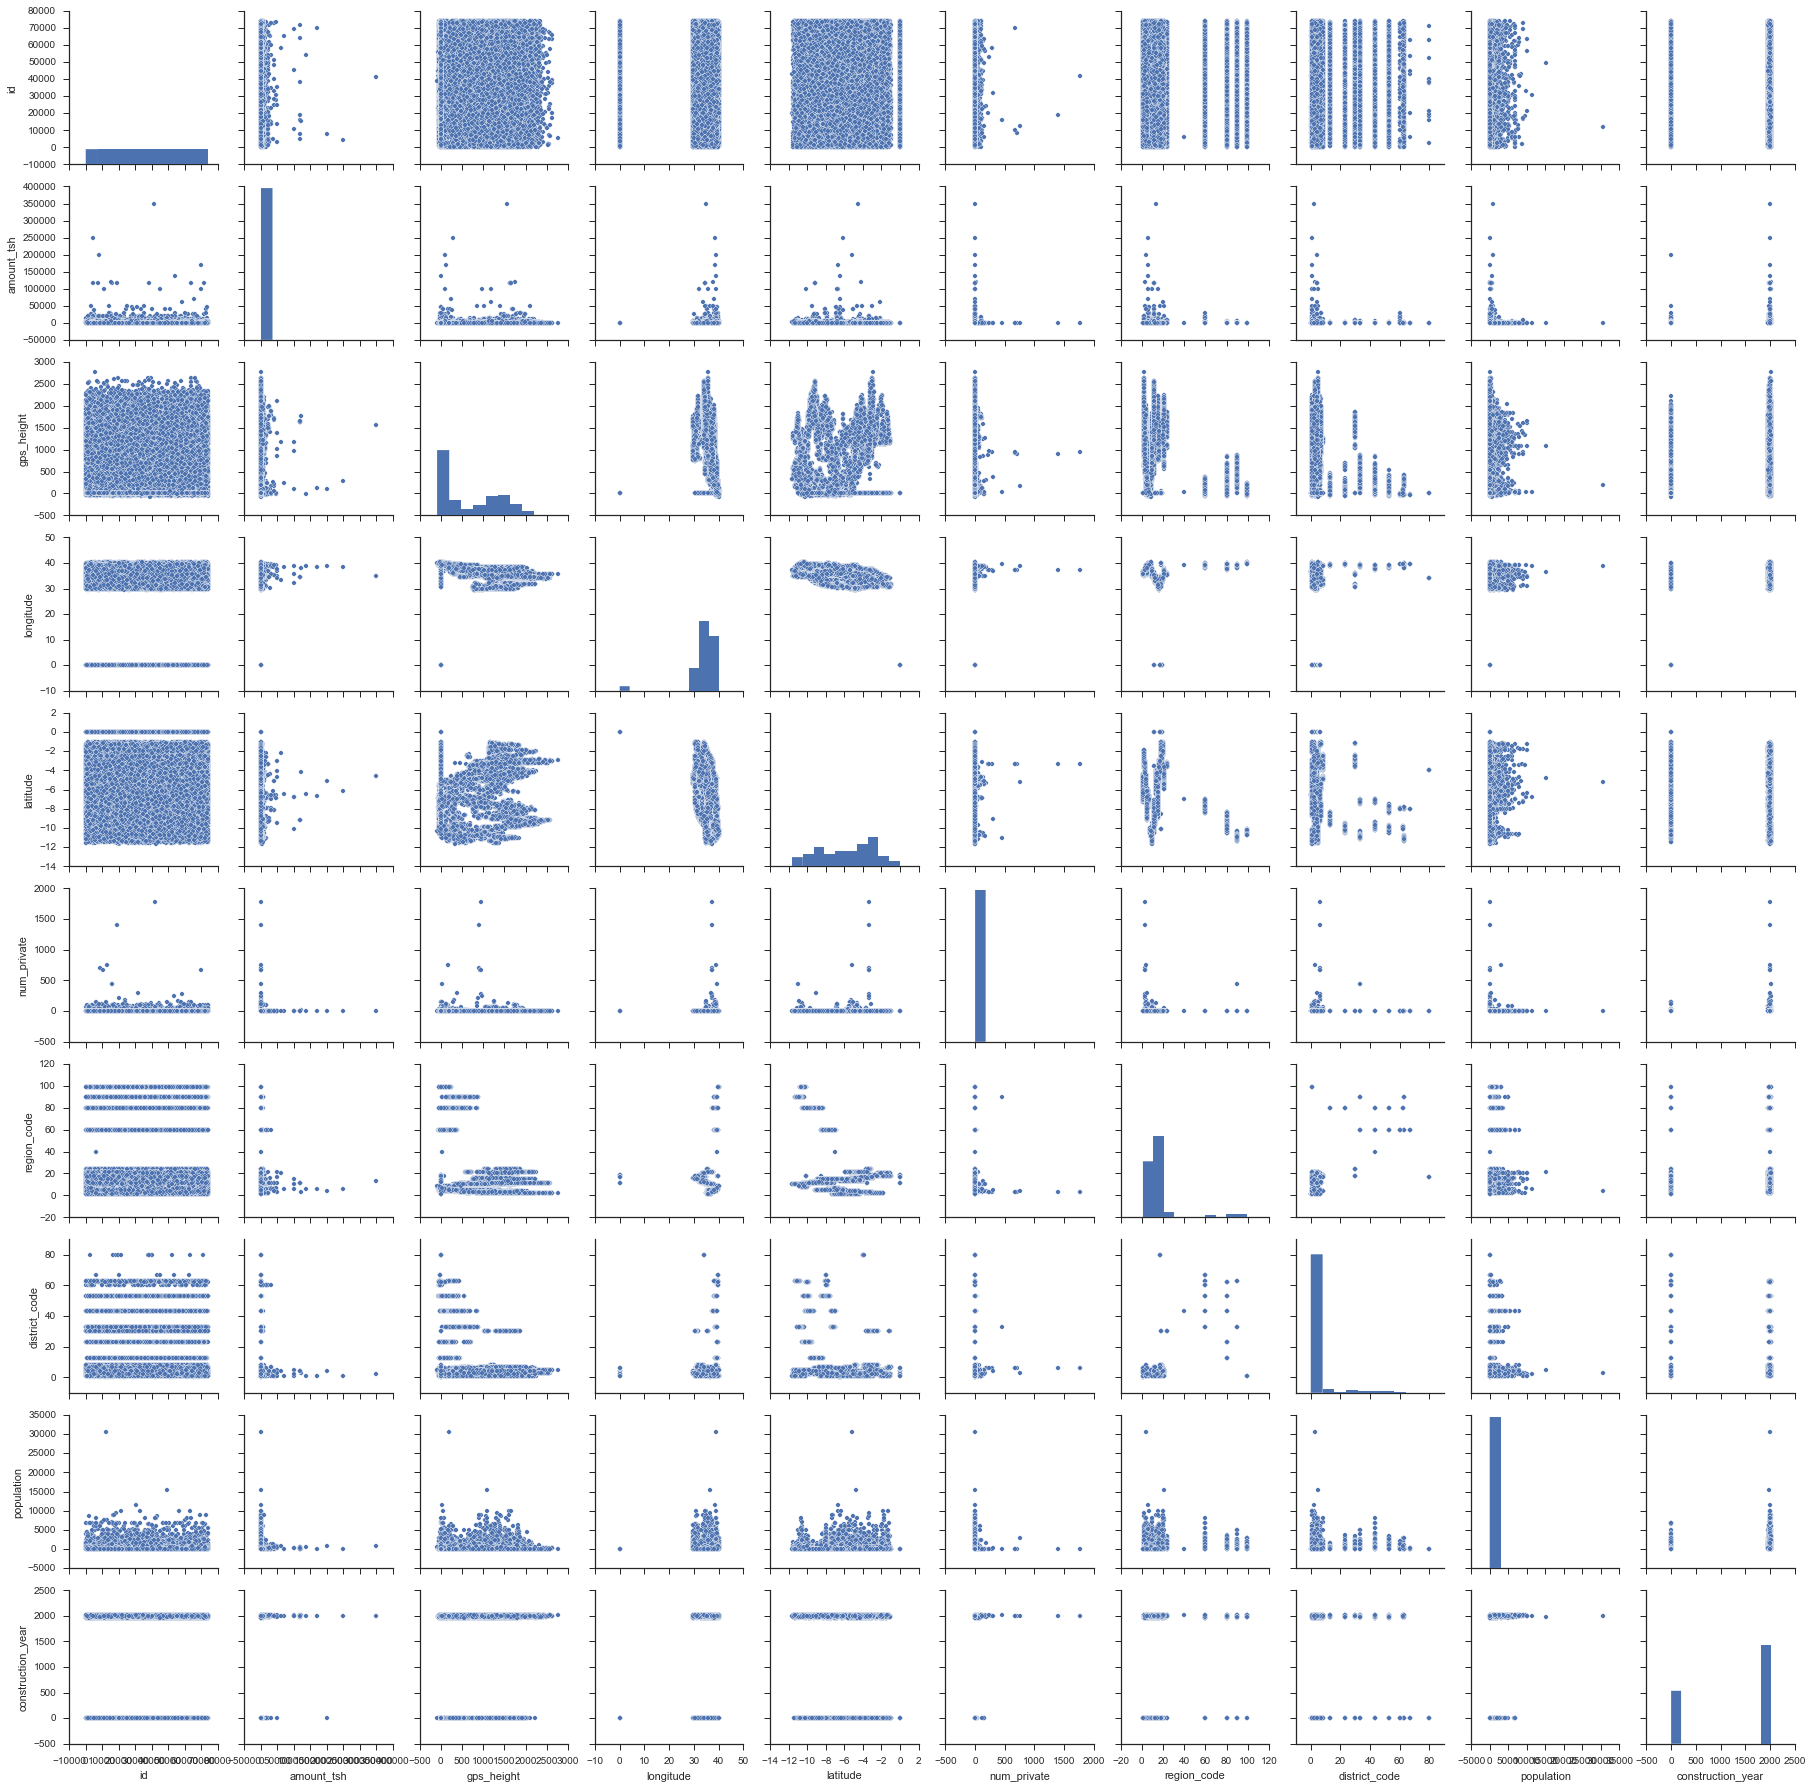

In [163]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

g = sns.pairplot(water_tidy)

### 4. What are the other salient aspects of the data (e.g. geospatial factors, text content, etc.) 


In [27]:
def get_marker_color(status):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if status == 'functional':
        return ('go')
    elif status == 'functional needs repair':
        return ('yo')
    else:
        return ('ro')

In [28]:
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
    
def build_map(lons, lats, statuses, group):
    
    # Make this plot larger.
    plt.figure(figsize=(16,12))

    eq_map = Basemap(width=870000, height=659000,
                     projection='tmerc', resolution = 'i', area_thresh = 0.1,
                    lat_0=-20, lon_0=25,
                    llcrnrlon=25, llcrnrlat=-20,
                    urcrnrlon=45, urcrnrlat=0)
    eq_map.drawcoastlines()
    eq_map.drawcountries()
    eq_map.fillcontinents(color = 'gray')
    #eq_map.bluemarble()
    eq_map.drawmapboundary()
    eq_map.drawmeridians(np.arange(0, 360, 30))
    eq_map.drawparallels(np.arange(-90, 90, 30))

    min_marker_size = 2.25
    for lon, lat, status in zip(lons, lats, statuses):
        x,y = eq_map(lon, lat)
        #msize = mag * min_marker_size

        marker_string = get_marker_color(status)
        eq_map.plot(x, y, marker_string, markersize=min_marker_size)


    # Label the region on the map
    #load region from csv file
    region_lat_lon = pd.read_csv('region_lat_lon.csv')
    labels = region_lat_lon.region
    region_x = region_lat_lon.longitude 
    region_y = region_lat_lon.latitude

    for label, xpt, ypt in zip(labels, region_x, region_y):
        x,y =eq_map(xpt, ypt)
        plt.text(x, y, label)

    title_string = "Water Pump in Tanzanian - " + group
    #title_string += "%s through %s" % (timestrings[-1][:10], timestrings[0][:10])
    plt.title(title_string)

    plt.show()

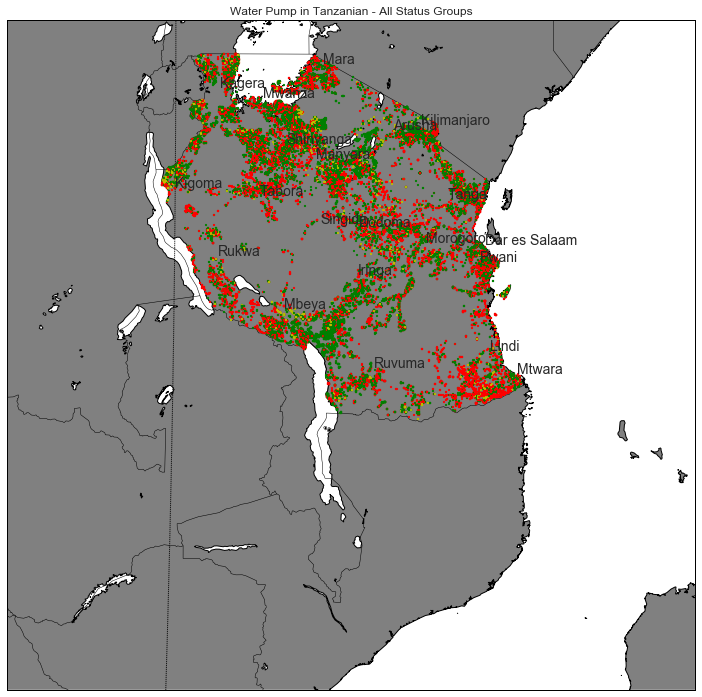

In [29]:
lats, lons = [], []  # latitude and logitude of the pump
status = []  # status_group of the pump

# build a map for pumps of all status groups
water_functional = water

lats = water_functional.latitude
lons = water_functional.longitude
statuses = water_functional.status_group

build_map(lons, lats, statuses, 'All Status Groups')

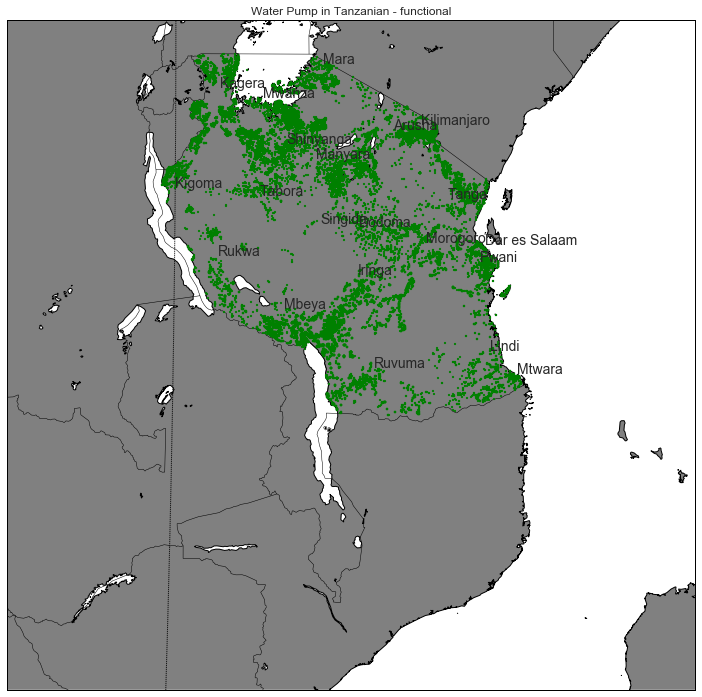

In [30]:
# build a map for pumps that are functional
water_functional = water[water.status_group == 'functional']

lats = water_functional.latitude
lons = water_functional.longitude
statuses = water_functional.status_group

build_map(lons, lats, statuses, 'functional')

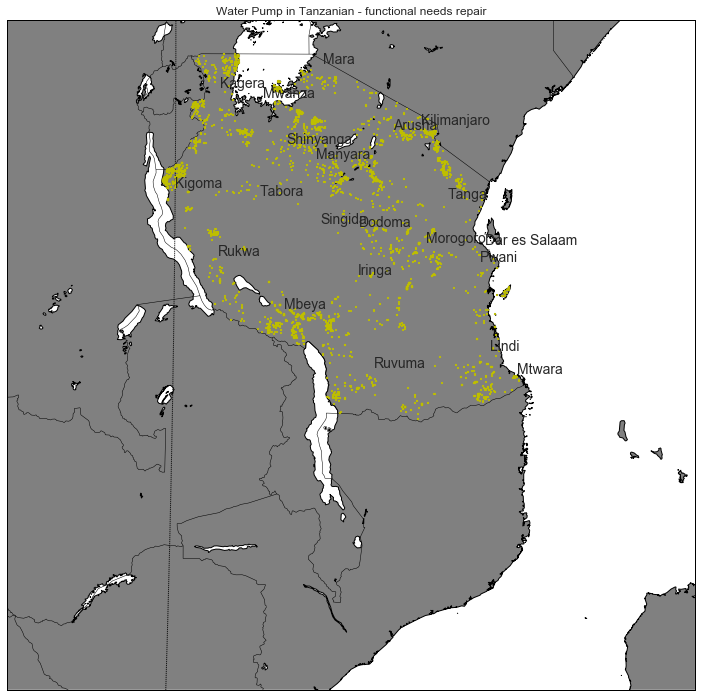

In [31]:
# build a map for pumps that are functional needs repair
water_functional = water[water.status_group == 'functional needs repair']

lats = water_functional.latitude
lons = water_functional.longitude
statuses = water_functional.status_group

build_map(lons, lats, statuses, 'functional needs repair')

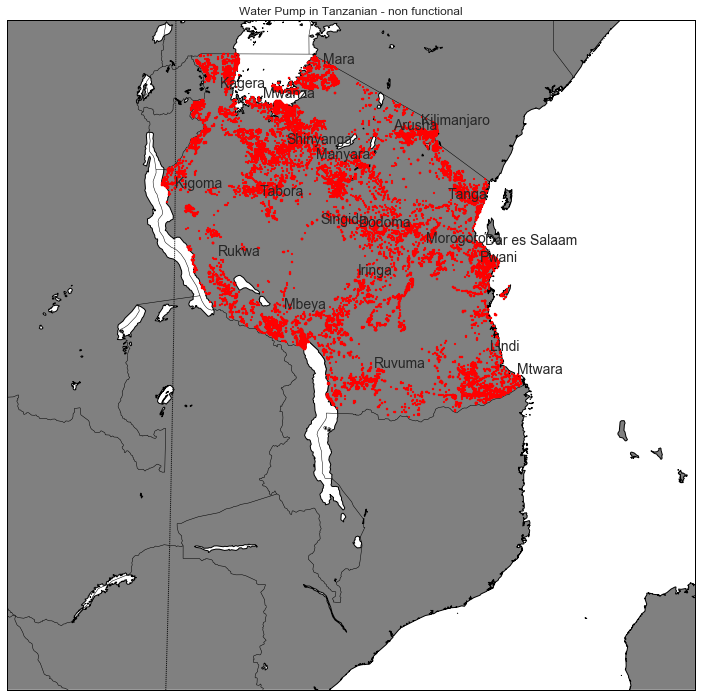

In [32]:
# build a map for pumps that are non functional 
water_functional = water[water.status_group == 'non functional']

lats = water_functional.latitude
lons = water_functional.longitude
statuses = water_functional.status_group

build_map(lons, lats, statuses, 'non functional')

Pumps with different status groups spread around and overlap across all the regions in Tanzanian.

In regions such as Mbeya and Manyara, there are more pumps that are functional. In regions such as Mtwara and Rukwa, there are more pumps that are non functional. Pumps that are functional needs repair scatter around in all regions, some of them are more concentrated in Kigoma, Mbeya, Arusha, and Kilimanjaro.

### 5. Provide a bullet-list of the next 5-10 tasks you will perform in analyzing your dataset. 


In [357]:
# #naming conventions after splitting DD's train set into train and validation sets
# water_train # thinking 80%
# water_validate #thinking 20%
# water_test #in final step, DD's test dataset